In [2]:
using Plots
using PyCall
using Images
using Statistics
rasterio = pyimport("rasterio");
scipy_interp = pyimport("scipy.interpolate");

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [3]:
#include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/load_s1slc_ann.jl");
include("/Users/eyu/Google Drive/DTU/9_semester/synthesis/code/syntese/coords2index/load_s1slc_ann.jl");
include("/Users/eyu/Google Drive/DTU/9_semester/synthesis/code/syntese/structs/SlcRaw.jl");

In [80]:
include("llh2sali.jl")
include("load_pod.jl")
include("load_s1slc_ann.jl");
include("load_dem_subset.jl");
include("grid_dem.jl");
include("dem_interp.jl");

In [5]:
f = open("ann_path.txt")
ann_path = readlines(f)[1]

f = open("data_path.txt")
data_path = readlines(f)[1]

"/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"

In [6]:
view = [1:7000, 1:9000]
test = SlcRaw(view, load_s1slc_ann(ann_path), load_s1slc_data(data_path, view))

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[1:7000,1:9000]

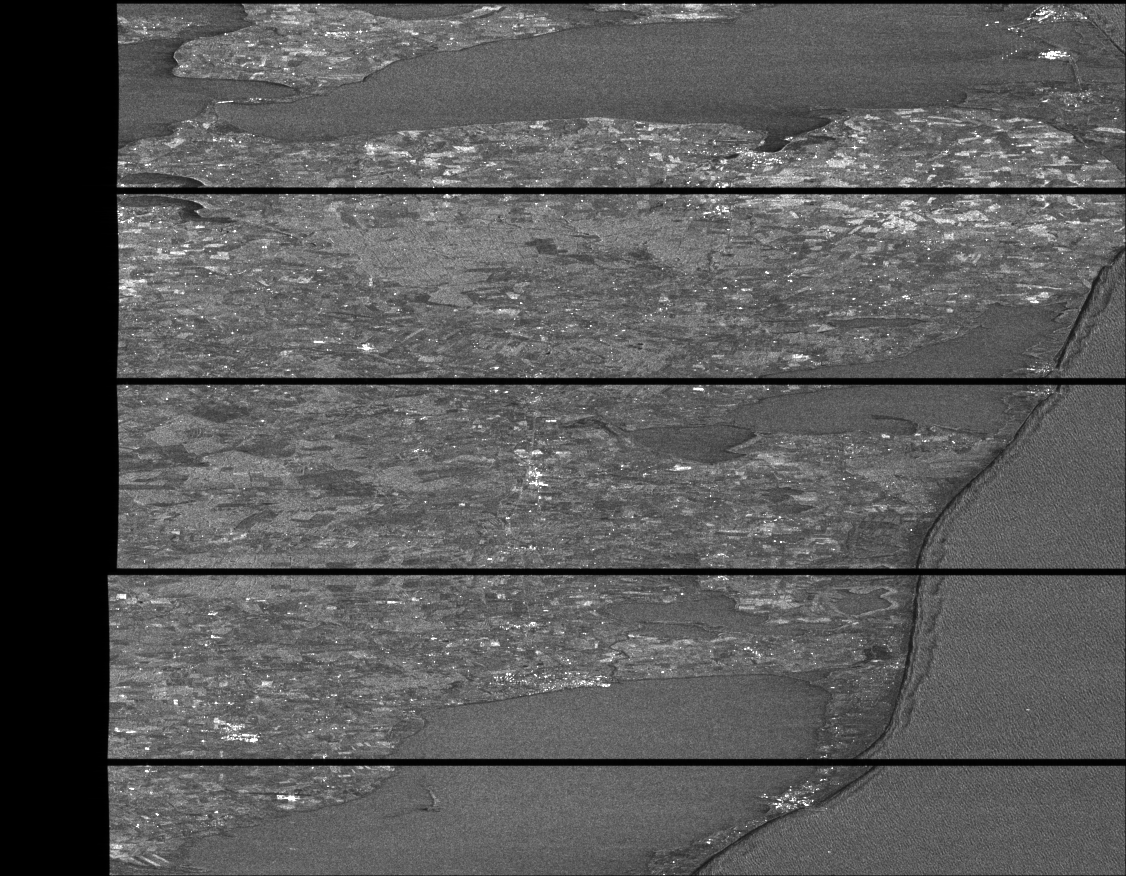

In [97]:
show_img(test)

In [7]:
rasterio = pyimport("rasterio");
file = open("dem_path.txt")
filename = readlines(file)[1]
dem_annotations = rasterio.open(filename);

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [8]:
lat_corners_slc, lon_corners_slc = footprint(test.meta, original_view(test))

([56.6682, 55.0213, 55.1425, 56.7901], [8.69213, 8.18786, 6.86364, 7.30989])

In [81]:
# could be from footprint
lat_corners_slc = [56.54182099999999, 56.581821]
lon_corners_slc = [8.247465, 8.367465000000001]

# load only the relevant DEM, 
# !!! til padding kan den her evt returnere min max af lat lon efter padding !!!
dem_cropped = load_dem_subset(dem_annotations, lat_corners_slc, lon_corners_slc;
                              approx_ellipsoid_value=39, 
                              nan_fill=10,
                              lat_padding=0, lon_padding=0);

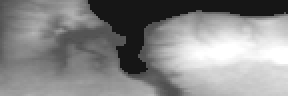

In [82]:
show_img(dem_cropped)

In [35]:
llh = grid_dem(dem_cropped, dem_annotations, lat_corners_slc, lon_corners_slc);

In [40]:
file = open("ann_path.txt")
path = readlines(file)
sar_parameters = load_s1slc_ann(path[1])

file = open("POD_path.txt")
path = readlines(file)
osv, t_sv = load_pod(path[1],sar_parameters["t_0"]);

In [41]:
dem_sample_line = llh2sali(llh, osv, t_sv, sar_parameters);

In [43]:
z = reshape(dem_cropped, :);

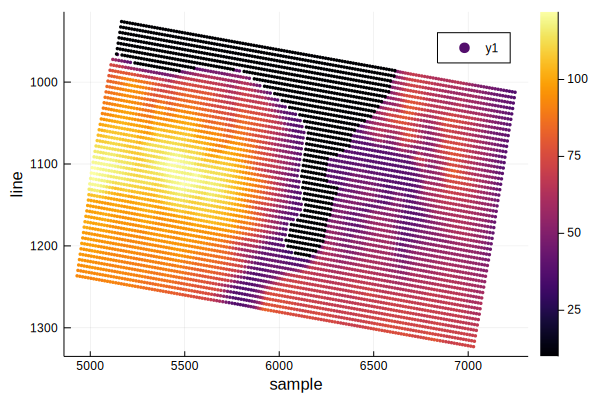

In [52]:
steps= 1
scatter(dem_sample_line[1:steps:end,2],dem_sample_line[1:steps:end,1],
    zcolor=z[1:steps:end],
    yaxis = ("line", :flip),xaxis = ("sample"),
    markersize=2, markerstrokewidth = 0)

In [ ]:
# transformer til sample line

In [71]:
z_grid = dem_interp(dem_sample_line[1:steps:end,2], 
                    dem_sample_line[1:steps:end,1], 
                    z[1:steps:end], 
                    5300:7000, 
                    1000:1220);

5300:70001000:1220

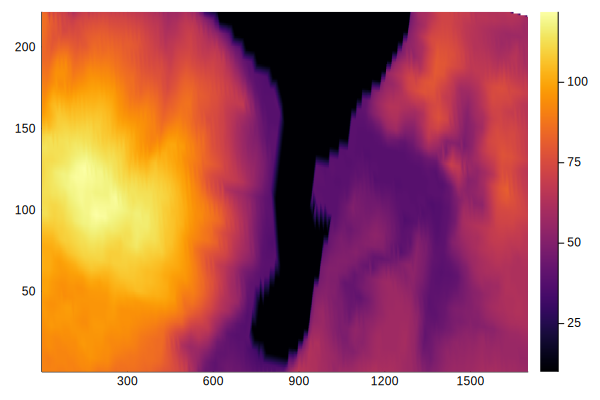

In [73]:
# this [end:-1:1, :] selection flips the image so it is the right way around
heatmap(z_grid[end:-1:1, :])